In [83]:
import numpy as np
import pandas as pd
import math
from scipy import misc
from pandas import DataFrame
import matplotlib.pyplot as plt

In [3]:
def f(x): #function y of x
    L=10
    E=200*10**9
    I=10**-4
    q=500
    y = (-((q*x**2)/(24*E*I)))*((x**2)-(4*L*x)+(6*L**2)) #equation
    return y #y(x) for value of x passed in the function

In [7]:
f(0.10101010101010102)

-6.334066666242626e-06

In [12]:
for i in range(1,6):
    x=i*0.10101010101010102
    print(x)

0.10101010101010102
0.20202020202020204
0.3030303030303031
0.4040404040404041
0.5050505050505051


In [13]:
3*0.10101010101010102

0.3030303030303031

In [14]:
f(3*0.10101010101010102)

-5.6241450034755005e-05

In [15]:
f(0.30303030303030304)

-5.624145003475499e-05

In [18]:
x=[]

In [19]:
for i in range(1,6):
    temp=i*0.10101010101010102
    x.append(temp)
x

[0.10101010101010102,
 0.20202020202020204,
 0.3030303030303031,
 0.4040404040404041,
 0.5050505050505051]

In [21]:
x[2]=0.30303030303030304 #dont know why the multiplicative of 3 is 0.30303030303030304 as it should be 0.3030303030303031 so i just replaced it
x

[0.10101010101010102,
 0.20202020202020204,
 0.30303030303030304,
 0.4040404040404041,
 0.5050505050505051]

In [23]:
deflection=[] #making a list deflection to be filled by corresponding values of y(x) which i will add to a pandas dataframe and then export as csv as expected in question

In [24]:
for j in range(len(x)):
    temp1 = f(x[j])
    deflection.append(temp1)
deflection

[-6.334066666242626e-06,
 -2.516579958172705e-05,
 -5.624145003475499e-05,
 -9.930987186451741e-05,
 -0.00015412252146109444]

In [34]:
df = pd.DataFrame(
    {'x': x,
     'deflection': deflection,
    }) # inserting list to dataframe

In [35]:
df

,x,deflection
0,0.101010,-0.000006
1,0.202020,-0.000025
2,0.303030,-0.000056
3,0.404040,-0.000099
4,0.505051,-0.000154


In [82]:
df.to_csv("deflection.txt", header = False)  #exporting result to txt file

In [100]:
deflection

[-6.334066666242626e-06,
 -2.516579958172705e-05,
 -5.624145003475499e-05,
 -9.930987186451741e-05,
 -0.00015412252146109444]

In [108]:
df2=pd.DataFrame()

In [179]:
fit1 = np.polyfit(x, deflection, 1)

In [180]:
fit2 = np.polyfit(x, deflection, 2)

In [181]:
fit3 = np.polyfit(x, deflection, 3)

In [182]:
fit4 = np.polyfit(x, deflection, 4)

In [154]:
df2=pd.DataFrame(fit1, columns=['1'])

In [155]:
df3=pd.DataFrame(fit2, columns=['2'])

In [156]:
df4=pd.DataFrame(fit3, columns=['3'])

In [157]:
df5=pd.DataFrame(fit4, columns=['4'])

In [158]:
df2=df2.append(df3, ignore_index = True) 

In [159]:
df2=df2.append(df4, ignore_index = True) 

In [160]:
df2=df2.append(df5, ignore_index = True) 

In [161]:
df2

,1,2,3,4
0,-0.000366,NaN,NaN,NaN
1,0.000043,NaN,NaN,NaN
2,NaN,-5.877422e-04,NaN,NaN
3,NaN,-9.816378e-06,NaN,NaN
4,NaN,7.042503e-07,NaN,NaN
5,NaN,NaN,4.040404e-05,NaN
6,NaN,NaN,-6.244731e-04,NaN
7,NaN,NaN,-8.741783e-08,NaN
8,NaN,NaN,4.684592e-09,NaN
9,NaN,NaN,NaN,-1.041667e-06


In [162]:
df2t = df2.T

In [163]:
df2t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,-0.000366,0.000043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.000588,-0.00001,7.042503e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.00004,-0.000624,-8.741783e-08,4.684592e-09,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000001,0.000042,-0.000625,-2.080520e-18,1.803110e-19


In [166]:
df2t.to_csv("coefficients.txt", header = False)

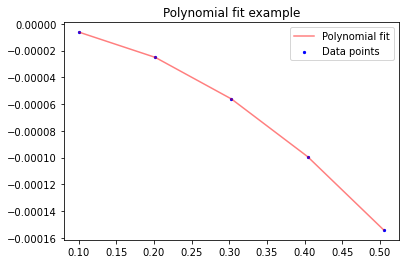

In [185]:
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, deflection,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, deflection, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
ax1.legend()
plt.show()